Clasificación de imágenes usando SVMs
===

* *30 min* | Ultima modificación: Junio 22, 2019

**Bibliografia.**

* Learning scikit-learn: Machine Learning in Python. R. Garreta, G. Moncecchi. Packt Publishing, 2013.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

En este tutorial se presentan d

## Descripción de la base de datos

La base de datos contiene diez imágenes diferentes para 40 sujetos diferentes. Las imágenes difieren en la iluminación, la expresión facial y los detalles (usa lentes / no usa lentes). Esta base será usada para ejemplificar el uso de SVMs en la clasificación de imágenes.

In [2]:
#
# los datos se encuentran disponibles directamente en scikit-learn
#
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

In [3]:
#
# Campos del dataset
#
print(faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [4]:
#
# El campo `data` es una matriz con una imagen por fila
#
faces.data.shape

(400, 4096)

In [5]:
faces.data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [6]:
#
# El campo `images` contiene la imagen organizada en un cuadro de 64 x 64
#
faces.images.shape

(400, 64, 64)

In [7]:
#
# El campo `target` contiene la identificación del sujeto
#
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

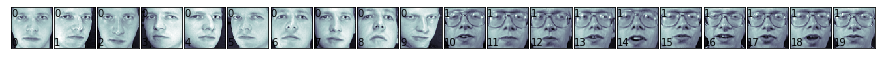

In [8]:
#
# Esta función permite imprimir una fila de figuras
#
def print_faces(images, target, top_n):
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

## primeras 20 imágenes
print_faces(faces.images, faces.target, 20)

## Problema 1: Identificación de una persona

En este problema se desea identificar una persona a partir de una imágen nueva, usando como base, imágenes conocidas de ella.

In [9]:
#
# Divide la muestra en entrenamiento y validación
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    faces.data, 
    faces.target, 
    test_size=0.25, 
    random_state=0)

In [10]:
#
# Crea el clasificador
# 
from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [11]:
#
# Evalua el clasificador usando validación cruzada
#

from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, n_splits):
    
    # Crea el objeto para partir los datos
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=8)
    
    # Realiza la partición para la muestra de datos de entrenamiento
    cv = kf.get_n_splits(X)
    
    # Ejecuta el entrenamiento para cada partifición
    scores = cross_val_score(clf, X, y, cv=cv)
    
    # Reporta los resultados
    print(scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(np.mean(scores), sem(scores)))
    
evaluate_cross_validation(
    clf=clf, 
    X=X_train, 
    y=y_train, 
    n_splits=4)

[0.96       0.92       0.97333333 0.93333333]
Mean score: 0.947 (+/-0.012)


In [12]:
#
# También es posible crear una función que 
# entrene y reporte la precisión directamente
#
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    print("Accuracy on training set:")
    print(clf.score(X_train, y_train))
    print("Accuracy on testing set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
    
train_and_evaluate(
    clf, 
    X_train, X_test, 
    y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         

## Problema 2: Identificar personas con lentes

En este problema se desea que el clasificador permite identificar imágenes de rostros con lentes. Note que no hay un conjunto de pronóstico.

### Aproximación 1

Los conjuntos de entrenamiento y validación contienen rostros de la misma persona con y sin lentes.

In [13]:
#
# Indices de las imágenes con lentes.
# Note que aca se dá un rango de índices para 
# las imágenes
#
glasses = [
    (10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
    (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
    (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
    (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
    (330, 339), (358, 359), (360, 369)
]

#
# La siguiente función crea los índices correspondientes a los
# rangos de los segmentos definidos en la variable ´glasses`
#
def create_target(segments):
    #
    # Se crea un vector de ceros
    #
    y = np.zeros(faces.target.shape[0])
    
    #
    # Se llena de 1s para las imágenes que tienen lentes
    #
    for (start, end) in segments:
        y[start:end + 1] = 1
        
    #
    # Retorna la variable de salida para la clasificación
    #
    return y

target_glasses = create_target(glasses)

In [14]:
#
# Se parte la muestra para entrenamiento y validación.
#
X_train, X_test, y_train, y_test = train_test_split( 
    faces.data, 
    target_glasses,  # note que estos son los índices de las figuras
    test_size=0.25, 
    random_state=0)

#
# Crea el clasificador
#
clf = SVC(kernel='linear')

#
# Evalua la precisión usando CV
#
evaluate_cross_validation(
    clf, 
    X_train, 
    y_train, 
    5)

[0.98333333 1.         0.95       0.91666667 0.96666667]
Mean score: 0.963 (+/-0.014)


In [15]:
#
# Evaluación
#
train_and_evaluate(
    clf, 
    X_train, X_test, 
    y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        67
         1.0       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
[[66  1]
 [ 0 33]]


### Aproximación 2

Los conjuntos de entrenamiento y validación **no** contienen rostros de la misma persona. Los rostros de cada conjunto son diferentes. 

In [16]:
#
# Los rostros de las última 10 personas son usadas como 
# conjunto de test
#
X_test = faces.data[30:40]
y_test = target_glasses[30:40]  # tienen y no tienen lentes

In [17]:
#
# Se seleccionan las primeras 30 personas para entrenamiento
#
select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

In [18]:
train_and_evaluate(
    clf, 
    X_train, X_test, 
    y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion Matrix:
[[5 0]
 [1 4]]


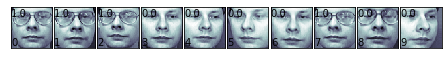

In [19]:
#
# Se pronostica para el conjunto de prueba
#
y_pred = clf.predict(X_test)

# para imprimir los rostros
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)